In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

### Polynomial Fitting

Converged at iteration 5459
Fitted Coefficients: [np.float64(1.9833876111063504), np.float64(-2.7591583059444846), np.float64(1.0183142601039004), np.float64(-0.3692206214492819)]
Final MSE: 0.009161047764568837


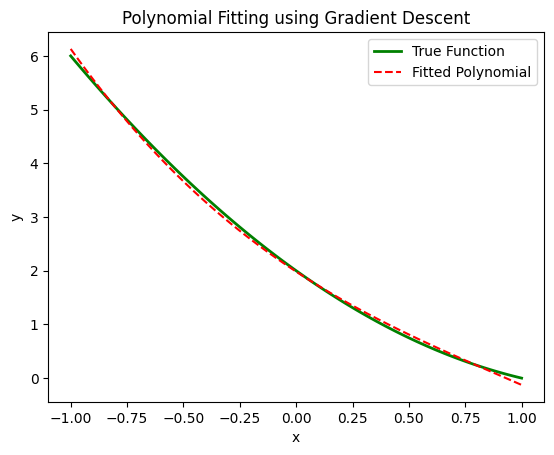

In [4]:
def generate_data(n_points= 100, noise= 0.1, true_coeffs= [2, -3, 1]):
    np.random.seed(42)
    x = np.linspace(-1, 1, n_points)
    y_true= sum(c*x**i for i, c in enumerate(true_coeffs))
    y_noisy = y_true + noise * np.random.randn(n_points)
    
    return x, y_noisy, y_true

def polynomial_model(x, coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def compute_gradients(x, y_true, coeffs):
    n = len(coeffs)
    y_pred = polynomial_model(x, coeffs)
    errors = y_pred - y_true
    gradients = [2*np.mean(errors * x**i) for i in range(n)]
    return gradients

def gradient_descent(x, y, degree, lr= 0.01, max_iter= 1000, tol= 1e-6):
    coeffs= np.random.randn(degree + 1)
    mse_history = []
    
    for iteration in range(max_iter):
        y_pred = polynomial_model(x, coeffs)
        mse = compute_mse(y, y_pred)
        mse_history.append(mse)
        
        if len(mse_history) > 1 and abs(mse_history[-1] - mse_history[-2]) < tol:
            print(f"Converged at iteration {iteration}")
            break
        
        gradients = compute_gradients(x, y, coeffs)
        coeffs = [c-lr*g for c, g in zip(coeffs, gradients)]
        
    return coeffs, mse_history
    
def plot_results(x, y, y_true, coeffs):
    """
    Plot the original data, true function, and fitted polynomial.
    """
    #plt.scatter(x, y, label="Noisy Data", color="blue")
    plt.plot(x, y_true, label="True Function", color="green", linewidth=2)
    y_fitted = polynomial_model(x, coeffs)
    plt.plot(x, y_fitted, label="Fitted Polynomial", color="red", linestyle="--")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Polynomial Fitting using Gradient Descent")
    plt.show()
    
    
def main():
    # Step 1: Generate synthetic data
    x, y_noisy, y_true = generate_data(n_points=100, noise=0.1, true_coeffs=[2, -3, 1])
    
    # Step 2: Perform polynomial fitting
    degree = 3 # Degree of the polynomial to fit
    lr = 0.01    # Learning rate
    max_iter = 100000
    coeffs, mse_history = gradient_descent(x, y_noisy, degree, lr=lr, max_iter=max_iter)

    # Step 3: Display results
    print(f"Fitted Coefficients: {coeffs}")
    print(f"Final MSE: {mse_history[-1]}")
    plot_results(x, y_noisy, y_true, coeffs)

if __name__ == "__main__":
    main()
    

In [5]:
### Above polynomial fitting is computationally expensive for higher order say 5 and for larger x intervals ..(runge's phenomenon)
### Problems in above case:
### Gradient Descent Issues
## Description: Gradient descent may struggle with large gradients or updates due to the oscillations of the high-degree polynomial. If the learning rate is too high, it can 
## overshoot; if it's too low, convergence becomes extremely slow.
## Impact: When x values are spread over a large interval or the degree is high, the gradients of high-order terms become excessively large, making the algorithm inefficient or 
# unstable.

In [6]:
## Solutions to Handle the Issue:
## 1. Regularization: Add a regularization term (e.g., L2 regularization) to penalize large coefficients, which helps reduce overfitting and oscillations. 
##                    Modify the gradient descent update
##                    gradients = compute_gradients(x, y, coeffs)
##                    coeffs = [c - lr * (g + lambda_ * c) for c, g in zip(coeffs, gradients)]


## 2. Switch to Piecewise Methods: Instead of fitting a single high-degree polynomial, use splines or piecewise polynomials. These methods avoid the instability of high-degree polynomials.
##                                 Example: Fit a cubic spline over subintervals of the x-range.


## 3. Scale the x-Values: Scale  x to a smaller range (e.g., [-1, 1]) to reduce numerical issues with large powers.
##                         x_scaled = (x - np.mean(x)) / np.std(x)





Why These Techniques Works?
1. Chebyshev Nodes: Minimize oscillations at the boundaries.
2. Regularization: Reduces the risk of large coefficients, ensuring stability.
3. Scaling: Prevents large powers of x from dominating calculations.
4. Splines: Avoid the inherent instability of fitting a single high-degree polynomial.
5. Lower Degree: Simpler polynomials reduce overfitting and numerical issues.

### Improved gradient descent with regularization and scaling

Converged at iteration 9968
Fitted Coefficients: [np.float64(2.128926588192905), np.float64(-3.578948928041666), np.float64(1.6031261243995634), np.float64(3.3298583230039314), np.float64(-15.604065408607587), np.float64(0.2703429982597199)]
Final MSE: 0.05603252359300205


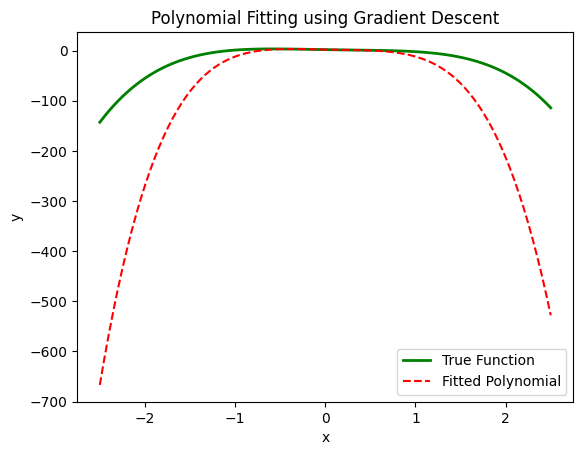

In [ ]:
def generate_data(n_points= 100, noise= 0.1, true_coeffs= [2, -3, 1, 1.4, -3.5]):
    np.random.seed(42)
    x = np.linspace(-2.5, 2.5, n_points)
    y_true= sum(c*x**i for i, c in enumerate(true_coeffs))
    y_noisy = y_true + noise * np.random.randn(n_points)
    
    return x, y_noisy, y_true

def polynomial_model(x, coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def compute_gradients(x, y_true, coeffs):
    n = len(coeffs)
    y_pred = polynomial_model(x, coeffs)
    errors = y_pred - y_true
    gradients = [2*np.mean(errors * x**i) for i in range(n)]
    return gradients

def gradient_descent_with_regularization(x, y, degree, lr=0.01, max_iter=1000, tol=1e-6, lambda_=0.01):
    coeffs = np.random.randn(degree + 1)  # Random initialization
    mse_history = []
    
    # Scale x to [-1, 1]
    x_scaled = (x - np.mean(x)) / np.std(x)
    
    for iteration in range(max_iter):
        y_pred = polynomial_model(x_scaled, coeffs)
        mse = compute_mse(y, y_pred)
        mse_history.append(mse)

        # Check stopping criteria
        if len(mse_history) > 1 and abs(mse_history[-1] - mse_history[-2]) < tol:
            print(f"Converged at iteration {iteration}")
            break
        
        # Update coefficients with regularization
        gradients = compute_gradients(x_scaled, y, coeffs)
        coeffs = [c - lr * (g + lambda_ * c) for c, g in zip(coeffs, gradients)]
    
    return coeffs, mse_history

    
def plot_results(x, y, y_true, coeffs):
    """
    Plot the original data, true function, and fitted polynomial.
    """
    #plt.scatter(x, y, label="Noisy Data", color="blue")
    plt.plot(x, y_true, label="True Function", color="green", linewidth=2)
    y_fitted = polynomial_model(x, coeffs)
    plt.plot(x, y_fitted, label="Fitted Polynomial", color="red", linestyle="--")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Polynomial Fitting using Gradient Descent")
    plt.show()
    
    
def main():
    # Step 1: Generate synthetic data
    x, y_noisy, y_true = generate_data(n_points=100, noise=0.1, true_coeffs=[2, -3, 1, 1.4, -3.5])
    
    # Step 2: Perform polynomial fitting
    degree = 5 # Degree of the polynomial to fit
    lr = 0.01    # Learning rate
    max_iter = 100000
    coeffs, mse_history = gradient_descent_with_regularization(x, y_noisy, degree, lr=lr, max_iter=max_iter)

    # Step 3: Display results
    print(f"Fitted Coefficients: {coeffs}")
    print(f"Final MSE: {mse_history[-1]}")
    plot_results(x, y_noisy, y_true, coeffs)

if __name__ == "__main__":
    main()
    
    
## It shows a comparatively good results 
    

### Least Square method